In [59]:
%load_ext autoreload 
%autoreload 2

import torch
from pathlib import Path
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import librosa
from fusanet_utils.datasets.simulated import SimulatedPoliphonic
from fusanet_utils.datasets.external import SINGAPURA
from fusanet_utils.datasets.aumilab import AUMILAB
import numpy as np
import matplotlib.pyplot as plt
eps = torch.finfo(torch.float).eps

spass = SimulatedPoliphonic('../', external=True, mini=True)
singapura = SINGAPURA('../')
aumilab = AUMILAB('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SPASS

In [60]:
mean = []
std = []
rmss = []
for file in spass.file_list:
    y, sr = librosa.load(file)
    rms = librosa.feature.rms(y=y)
    rmss.append(rms)
    mean.append(np.mean(rms))
    std.append(np.std(rms))

In [61]:
from IPython.display import Audio
f = spass.file_list[46]
print(f)
y, sr = librosa.load(f)
Audio(data=y, rate=sr)

../datasets/Poliphonic mono mini/audios/park00007.wav


In [62]:
all_audios_mean = np.mean(mean)
all_audios_std = np.mean(std)
all_audios_mean, all_audios_std

(0.023059638, 0.014214412)

Text(0.5, 1.0, 'Std')

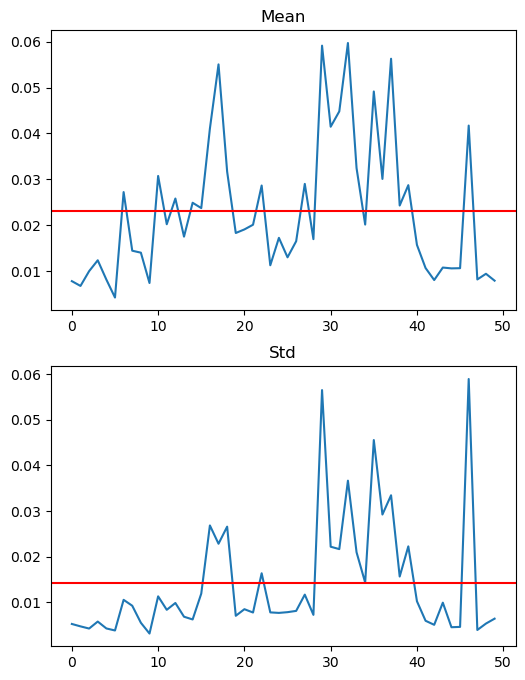

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(mean)
ax[0].axhline(y=all_audios_mean, color='r', linestyle='-')
ax[0].set_title('Mean')
ax[1].plot(std)
ax[1].axhline(y=all_audios_std, color='r', linestyle='-')
ax[1].set_title('Std')

Text(0.5, 1.0, 'Std')

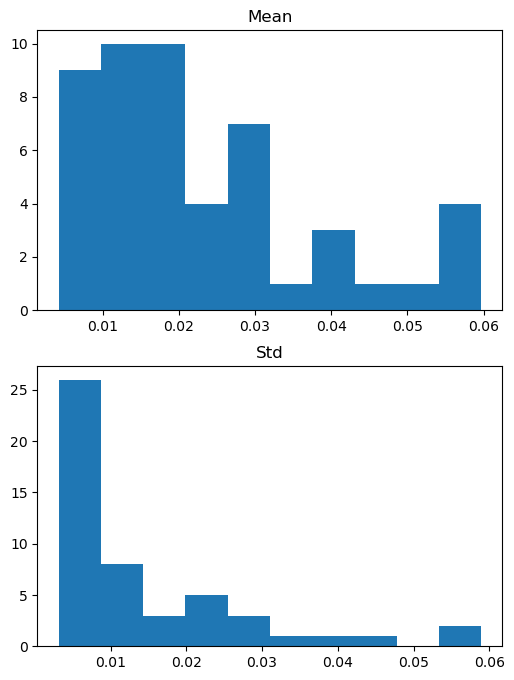

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].hist(mean)
ax[0].set_title('Mean')
ax[1].hist(std)
ax[1].set_title('Std')

# Singapura

In [65]:
import random
r = []
singapura_file_list = []
for x in range(50):
    singapura_file_list.append(singapura.file_list[random.randint(0, len(singapura.file_list))])

In [66]:
mean = []
std = []
rmss = []
for file in singapura_file_list:
    y, sr = librosa.load(file)
    rms = librosa.feature.rms(y=y)
    rmss.append(rms)
    mean.append(np.mean(rms))
    std.append(np.std(rms))

In [67]:
all_audios_mean = np.mean(mean)
all_audios_std = np.mean(std)
all_audios_mean, all_audios_std

(0.00057274255, 0.00013740637)

In [78]:
0.00057274255*100

0.057274254999999996

Text(0.5, 1.0, 'Std')

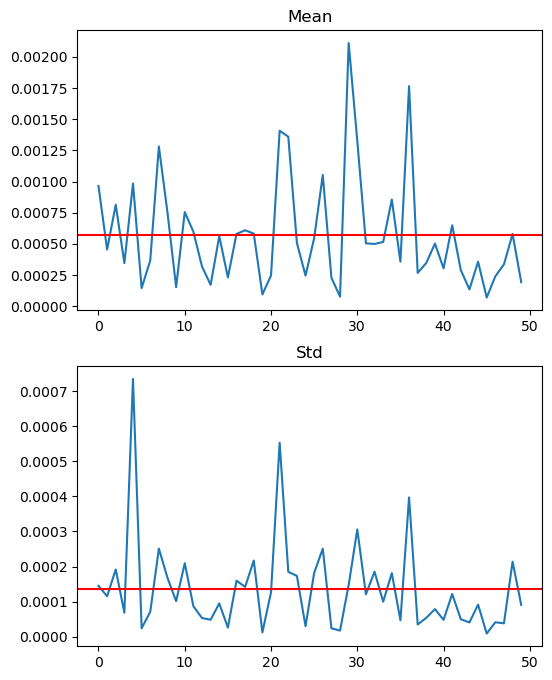

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(mean)
ax[0].axhline(y=all_audios_mean, color='r', linestyle='-')
ax[0].set_title('Mean')
ax[1].plot(std)
ax[1].axhline(y=all_audios_std, color='r', linestyle='-')
ax[1].set_title('Std')

Text(0.5, 1.0, 'Std')

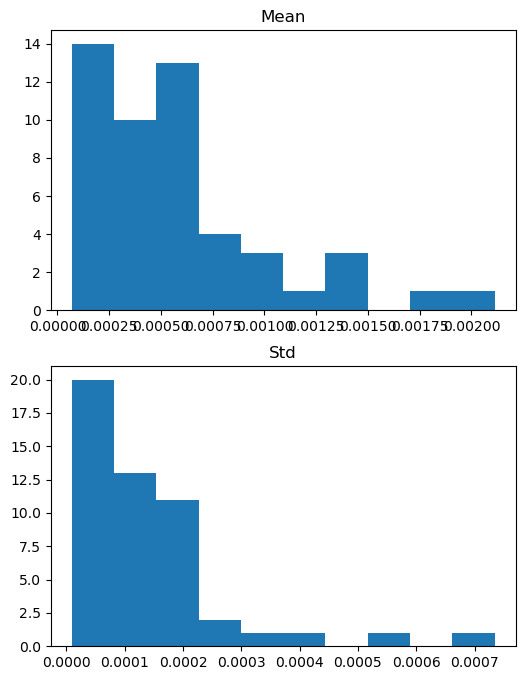

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].hist(mean)
ax[0].set_title('Mean')
ax[1].hist(std)
ax[1].set_title('Std')

# Aumilab

In [70]:
r = []
aumilab_file_list = []
for x in range(50):
    aumilab_file_list.append(aumilab.file_list[random.randint(0, len(aumilab.file_list))])

In [71]:
mean = []
std = []
rmss = []
for file in aumilab_file_list:
    y, sr = librosa.load(file)
    rms = librosa.feature.rms(y=y)
    rmss.append(rms)
    mean.append(np.mean(rms))
    std.append(np.std(rms))

/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

In [72]:
all_audios_mean = np.mean(mean)
all_audios_std = np.mean(std)
all_audios_mean, all_audios_std

(0.04928979, 0.021908257)

Text(0.5, 1.0, 'Std')

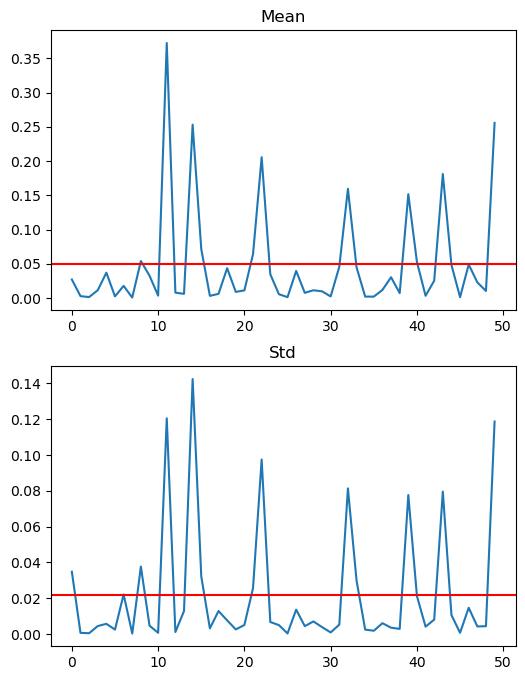

In [73]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(mean)
ax[0].axhline(y=all_audios_mean, color='r', linestyle='-')
ax[0].set_title('Mean')
ax[1].plot(std)
ax[1].axhline(y=all_audios_std, color='r', linestyle='-')
ax[1].set_title('Std')

Text(0.5, 1.0, 'Std')

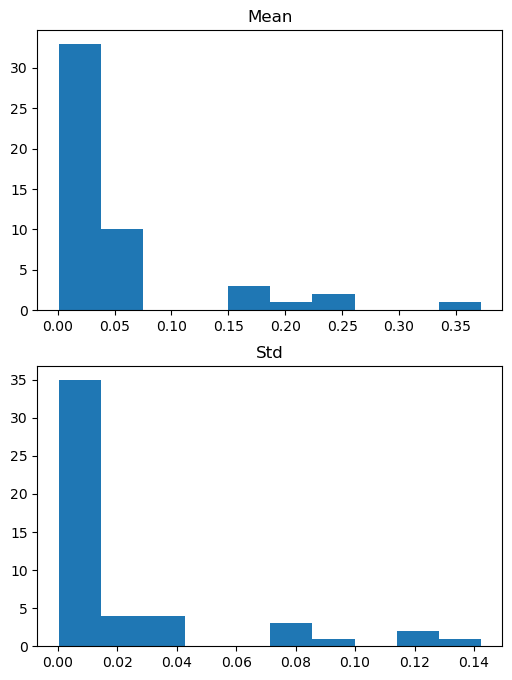

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].hist(mean)
ax[0].set_title('Mean')
ax[1].hist(std)
ax[1].set_title('Std')

In [539]:
#clases FUSA donde si hay clases SPASS
fusa_classes = [  'alerts/alarms',
                  'alerts/braking and skidding',
                  'alerts/horns',
                  'alerts/siren',
                  'animal/bird',
                  'animal/dog',
                  'environmental/rain',
                  'environmental/wind',
                  'humans/crowd',
                  'humans/others',
                  'humans/shouting',
                  'humans/talk',
                  'mechanical/cutting',
                  'mechanical/explosives',
                  'mechanical/impact',
                  'music/music',
                  'vehicles/bus',
                  'vehicles/cars',
                  'vehicles/motorcycles']
#Diccionario con clases FUSA y SPASS (33 clases)
fusa_taxonomy_int = {
    0: [3],
    1: [6],
    2: [17],
    3: [25],
    4: [5],
    5: [13],
    6: [22],
    7: [32],
    8: [11],
    9: [26],
    10: [24],
    11: [27],
    12: [12],
    13: [15, 16],
    14: [18],
    15: [21],
    16: [7, 8, 28, 29],
    17: [9, 10],
    18: [19, 20],
}

In [608]:
%load_ext autoreload 
%autoreload 2

import yaml
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path, PurePath
import torch
from torch.utils.data import DataLoader, ConcatDataset
import torchaudio
from IPython.display import Audio

from fusanet_utils.datasets.external import get_label_transforms, SINGAPURA
from fusanet_utils.datasets.aumilab import AUMILAB

from fusanet_utils.datasets.fusa import FUSA_dataset
from fusanet_utils.transforms import Collate_and_transform

#experiment_path = Path('../experiments/Poliphonic-HTS-pink-noise-clipping/')
experiment_path = Path('../experiments/Poliphonic-PANN-sed-pink-noise-clipping/')
print(experiment_path)
model = torch.load(str(experiment_path / 'model.pt'))
model.eval()
params = yaml.safe_load(open(str(experiment_path / 'params.yaml')))
fusa_dataset = FUSA_dataset(ConcatDataset([singapura]), params=params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../experiments/Poliphonic-PANN-sed-pink-noise-clipping


In [609]:
results = []
for i in range(1, 50):
    fusa_loader = DataLoader(fusa_dataset, batch_size=1, shuffle=True, pin_memory=True, num_workers=2,
                             collate_fn=Collate_and_transform(params["features"]))

    #a = np.arange(20, 110, 20)
    #amplifiers = np.insert(a, 0, 1)
    amplifiers = [1, 10, 50, 100]
    f1_scores = []
    for amplifier in amplifiers:
        waveforms, preds_model, labels_model, filenames_model = [], [], [], []
        with torch.no_grad():
            for sample in fusa_loader:
                #preds_model.append(model(sample).numpy())
                #labels_model.append(sample['label'].numpy())
                #filenames_model.append(sample['filename'])
                #waveforms.append(sample['waveform'])
                sample['waveform'] = sample['waveform'] * amplifier
                preds_model.append(model(sample).numpy())
                labels_model.append(sample['label'].numpy())
                filenames_model.append(sample['filename'])
                waveforms.append(sample['waveform'])
                break

        preds_soft, labels = {}, {}
        preds_soft = np.concatenate(preds_model)
        labels = np.concatenate(labels_model)

        th = 0.50
        models = ['HTS-pink-noise-clipping']
        preds = [preds_soft > th]

        idx_others = [3, 7, 8, 18, 23] #indices de clases FUSA donde SPASS no contiene clase (others)
        labels = np.delete(labels, idx_others, 2)

        preds = preds[0]
        file_names = filenames_model

        pred_macro = np.stack([np.amax(preds[:, :, fusa_taxonomy_int[macro]], axis=-1) for macro in range(len(fusa_classes))])
        label_macro = labels.reshape(pred_macro.shape)

        TP = np.sum((pred_macro==1) & (label_macro==1), axis=(1, 2))
        FP = np.sum((pred_macro==1) & (label_macro==0), axis=(1, 2)) #insertions
        FN = np.sum((pred_macro==0) & (label_macro==1), axis=(1, 2)) #deletions
        prec = TP / (TP + FP + eps)
        recall = TP / (TP + FN + eps)

        f1_score = 2 * prec * recall / (prec + recall + eps)
        f1_score = [i for i in f1_score if i != 0]
        f1_scores.append(np.mean(TP))
    results.append([sample['filename'], sample['waveform'], f1_scores])

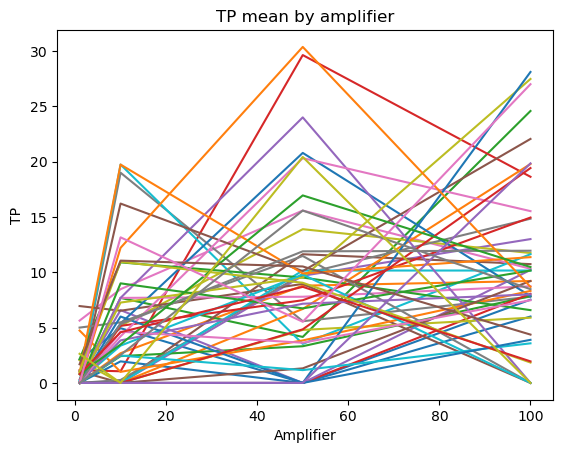

In [610]:
for r in results:
    #plt.title('F1-Score means by amplifier')
    plt.title('TP mean by amplifier')
    plt.xlabel('Amplifier')
    #plt.ylabel('F1-Score')
    plt.ylabel('TP')
    plt.plot(amplifiers, r[2], label = r[0])
    #plt.legend(bbox_to_anchor=(2,1), loc="lower right",  bbox_transform=fig.transFigure)

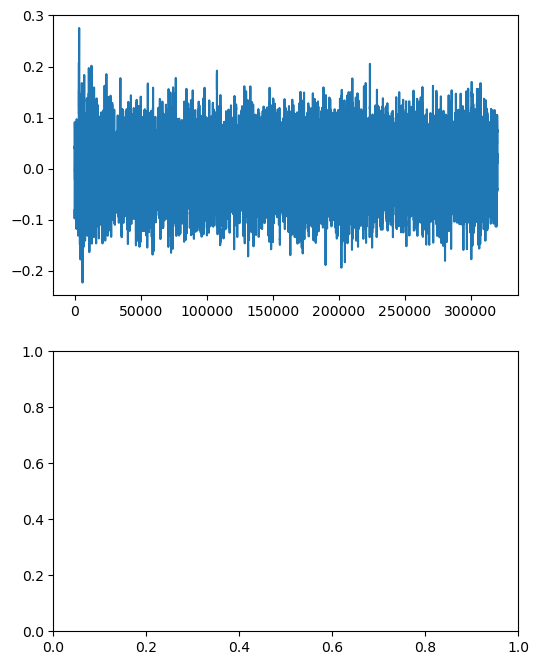

In [534]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(waveforms[0][0][0])
#ax[1].plot(waveforms[1][0][0])

In [535]:
filenames_model

[['[b827ebb954cd][2020-08-22T09-39-04Z][manual][---][de313d12d7f31937615be80cc47a1ad9][]-110.flac']]

In [536]:
preds_soft, labels = {}, {}
preds_soft = np.concatenate(preds_model)
labels = np.concatenate(labels_model)

In [537]:
th = 0.50
models = ['HTS-pink-noise-clipping']
preds = [preds_soft > th]

In [538]:
idx_others = [3, 7, 8, 18, 23] #indices de clases FUSA donde SPASS no contiene clase (others)
labels = np.delete(labels, idx_others, 2)

In [540]:
preds = preds[0]
file_names = filenames_model

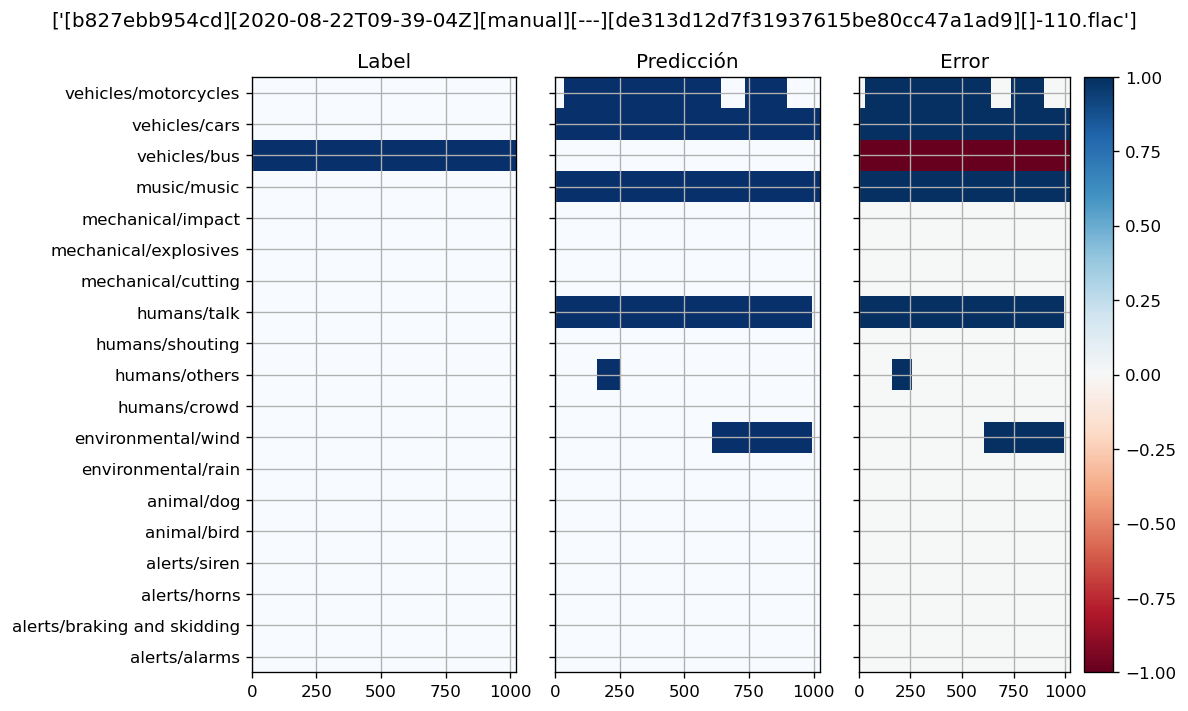

In [541]:
def plot_file_prediction(idx: int):
    pred = np.stack([np.amax(preds[idx][:, fusa_taxonomy_int[macro]], axis=1) for macro in range(len(fusa_classes))])
    label = labels[idx].T
    fig, ax = plt.subplots(1, 3, figsize=(10, 6), facecolor='w', dpi=120,
                           tight_layout=True, sharex=True, sharey=True)
    ax[0].pcolormesh(label, cmap=plt.cm.Blues, vmin=0, vmax=1)
    ax[1].pcolormesh(pred, cmap=plt.cm.Blues, vmin=0, vmax=1)
    fig.suptitle(file_names[idx])
    ax[0].set_title('Label')
    ax[1].set_title('Predicción')
    cmap = ax[2].pcolormesh((pred - label), cmap=plt.cm.RdBu, vmin=-1, vmax=1)
    fig.colorbar(cmap)
    ax[2].set_title('Error')
    ax[0].set_yticks(np.arange(0, len(fusa_classes), step=1) + 0.5)
    ax[0].set_yticklabels((fusa_classes));
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
plot_file_prediction(0)

In [542]:
#plot_file_prediction(1)

In [543]:
Audio(data=waveforms[0][0][0], rate=sr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'F1-Score [%]')

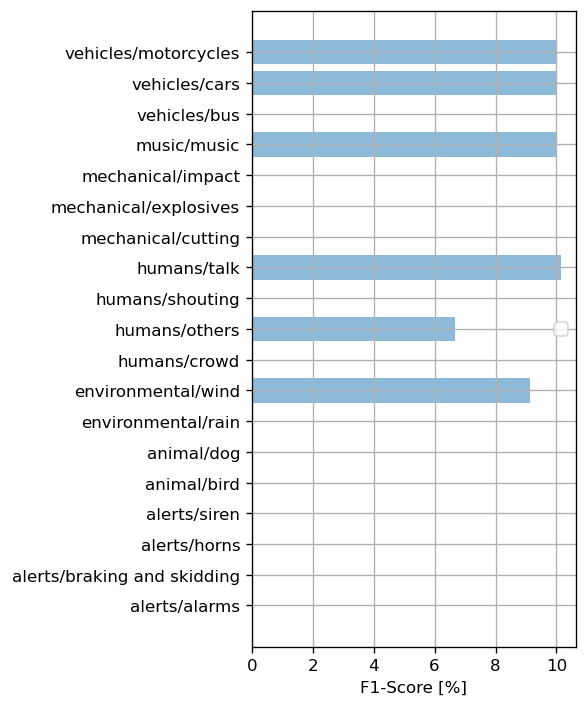

In [545]:
fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', dpi=120,
                       tight_layout=True, sharey=True, sharex=True)
pred_macro = np.stack([np.amax(preds[:, :, fusa_taxonomy_int[macro]], axis=-1) for macro in range(len(fusa_classes))])
label_macro = labels.reshape(pred_macro.shape)

TP = np.sum((pred_macro==1) & (label_macro==1), axis=(1, 2))
FP = np.sum((pred_macro==1) & (label_macro==0), axis=(1, 2)) #insertions
FN = np.sum((pred_macro==0) & (label_macro==1), axis=(1, 2)) #deletions
prec = TP / (TP + FP + eps)
recall = TP / (TP + FN + eps)

f1_score = 2 * prec * recall / (prec + recall + eps)
ax.barh(y=fusa_classes, width=100*f1_score, alpha=0.5)

ax.legend(loc='center right')
ax.grid()
ax.set_xlabel('F1-Score [%]')

In [546]:
f1_score = [i for i in f1_score if i != 0]
amplifier, np.mean(f1_score)

(100, 0.09324281971064004)

Text(0.5, 1.0, 'F1-Score means by amplifier')

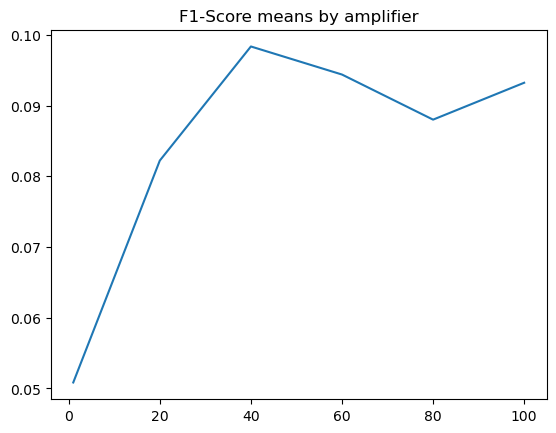

In [548]:
a = np.arange(20, 110, 20)
a = np.insert(a, 0, 1)
b = [0.05084, 0.08223, 0.09837, 0.09440, 0.08802, 0.09324]
plt.plot(a, b)
plt.title('F1-Score means by amplifier')